# PyTorch Workshop
Author: Jin Yeom (jinyeom@utexas.edu)

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

![pytorch](images/pytorch.png)

**[PyTorch](https://pytorch.org/)** is an open source machine learning library for Python, developed by Facebook. Its stengths include,
- generally faster and more intuitive than TensorFlow
- well integrated with Python and easy to debug
- dynamic computational graph, which makes it more suitable for recurrent models and reinforcement learning

In [4]:
import torch
import torchvision
from torchvision import transforms
from torchvision import datasets

## Basic tensor operations

In [5]:
A = torch.zeros((2, 3))
print(A)

tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])


In [6]:
B = torch.ones_like(A)
print(B)

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])


In [7]:
C = torch.full_like(B, 5)
print(C)

tensor([[ 5.,  5.,  5.],
        [ 5.,  5.,  5.]])


In [8]:
D = torch.cat([A, B, C], dim=0)
print(D)

tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 5.,  5.,  5.],
        [ 5.,  5.,  5.]])


In [9]:
print(D.shape)
E = torch.reshape(D, (2, 9))
print(E)

torch.Size([6, 3])
tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  5.,  5.,  5.,  5.,  5.,  5.]])


In [10]:
# NOTE: torch.t can be used for 2D matrices, but, torch.transpose
# provides a more general functionality, which can be used for any
# numbers of dimensions.
E_t = torch.transpose(E, 0, 1)
print(E_t)

tensor([[ 0.,  1.],
        [ 0.,  1.],
        [ 0.,  1.],
        [ 0.,  5.],
        [ 0.,  5.],
        [ 0.,  5.],
        [ 1.,  5.],
        [ 1.,  5.],
        [ 1.,  5.]])


## Neural Networks

In [11]:
class TwoLayerFullyConnected(torch.nn.Module):
    def __init__(self, in_dim, hid_dim, out_dim):
        super(TwoLayerFullyConnected, self).__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(in_dim, hid_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hid_dim, out_dim),
            torch.nn.Softmax(out_dim))
        
    def forward(self, x):
        return self.model.forward(x)

In [43]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

mnist_train = datasets.MNIST("./datasets/mnist", 
                             train=True, 
                             transform=transform, 
                             download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, 
                                           batch_size=4, 
                                           shuffle=True, 
                                           num_workers=2)

mnist_test = datasets.MNIST("./datasets/mnist", 
                            train=False, 
                            transform=transform, 
                            download=True)
test_loader = torch.utils.data.DataLoader(mnist_test, 
                                          batch_size=4, 
                                          shuffle=False, 
                                          num_workers=2)

In [44]:
print("datasets/mnist/raw:")
!ls datasets/mnist/raw
print("datasets/mnist/processed:")
!ls datasets/mnist/processed

datasets/mnist/raw:
t10k-images-idx3-ubyte	train-images-idx3-ubyte
t10k-labels-idx1-ubyte	train-labels-idx1-ubyte
datasets/mnist/processed:
test.pt  training.pt


In [65]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")

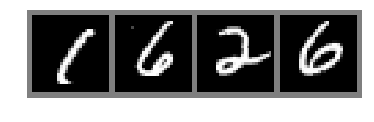

In [68]:
train_iter = iter(train_loader)
images, labels = train_iter.next()
imshow(torchvision.utils.make_grid(images))